# CSCI 347: Project 2: Exploring Graph Data
### Mason Reyher, Henry Breckenridge, Jacob Sitch, Nathan Parnell, Josh Harvey

Choose a data set that you are interested in from one of the following sources: </br>
SNAP collection: https://snap.stanford.edu/data </br>
Network Repository: http://networkrepository.com/index.php

Run all the analysis in this project on the largest connected component of the graph. 
Note that many of these datasets are quite large. If analyzing the data its taking too long, you may preprocess it by taking a sample of the graph first, and then extracting the largest connected component, to get 
the graph down to a manageable size. 

## Part 1: Think about the data 
In a well-written paragraph, answer the following questions: 

Network ref: </br>
(BiBTeX reference) </br>
eco-foodweb-baydry </br>
@inproceedings{nr-aaai15,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {Proceedings of the Twenty-Ninth AAAI Conference on Artificial Intelligence},
      url={http://networkrepository.com},
      year={2015}
  }

1. [3 points] Why are you interested in this data set? 


Ecosystem relationships are always fun to hypothesize, but with actual data, it's neat to see how the food web interacts. As wee ten year olds we learned of the food chain, but with foodweb data we can assuredly see and analyze who eats who, how often, and for what purposes. That allows us to further separate and identify ecological niches in natural evironments, and assess populations who may or may not be healthy sizes.

2. [3 points] Clearly state if/how the data was pre-processed (Was the largest connected component extracted? Was a sample of vertices or edges taken? If so, describe the sampling process that was used. ) 
 


The data was not preprocessed. There are 128 nodes and 2106 edges. This is sufficient (and not overbearing) for computation.

3. [6 points] Before doing any analysis, answer the following questions: 
 


1. [2 points] What characteristics do you expect the vertices with high centrality values to have and 
why? Specifically, think about non-graph characteristics. For example, we might expect highly 
central cities to have high populations or to house major industries in a graph where nodes represent 
cities and edges are roads between them.

In this case, vertices with high centrality values would be creatures that are highly important to the ecosystem's food web, for example, a field mouse would be be highly central, as a lot of other animals eat it, and it eats a lot of other things.

2. [2 points] Do you think that the degree distribution will exhibit a power law? Why or why not? 


No, I think that there will be more notes with a high degree, as there must be more prey to support the higher level predators within the food web, so there would be more creatures towards the bottom / mid levels of the food web that eat a lot of things (and get eaten by a lot of things) where as, for example an Eagle eats a lot of things, but does not get eaten, and there are fewer Eagles overall. 

3. [2 points] Do you think the graph will have the small-world property? Why or why not? 


No, the graph is very dense, and in the real world this makes sense as well, as an animal can't afford to be picky. I think that if the graph were to be a global food web, then it would show this property, as it would be highly clustered, to use a previous example, an Eagle from South America wouldn't fly to North Europe to eat a mouse there, whereas this data set is essentially focusing on just one cluster from the global food web. 

## Part 2: 
Write functions for graph analysis in Python 
Write the following functions in Python. You may assume that the input graph is simple — that it is 
undirected, unweighted, and has no parallel edges and no loops. Functions provided by networkx can be 
used within your code, as long as the function does not perform the same task as what you are being asked 
to implement (for example, you cannot use networkx’s “betweenness_centrality” function within your own 
betweenness centrality function, but you can use networkx’s functions for finding shortest paths). You may 
also assume that vertices are represented as integers (so the pair (1,3) indicates that there is an edge between 
vertex 1 and 3, for example).

In [1]:
%pip install networkx
%pip install matplotlib
%pip install pandas
%pip install numpy

# Required by nx.adjacency_matrix()
# %pip install scipy

You should consider upgrading via the '/Users/hankbreckenridge/git/school/csci-347/csci347_data_mining/proj_2/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/hankbreckenridge/git/school/csci-347/csci347_data_mining/proj_2/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/hankbreckenridge/git/school/csci-347/csci347_data_mining/proj_2/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/hankbreckenridge/git/school/csci-347/csci347_data_mining/proj_2/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


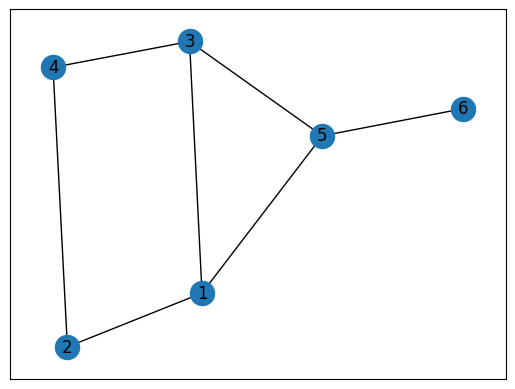

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from operator import itemgetter
import math

test_graph = [
    (1,2),
    (1,3),
    (1,5),
    (2,4),
    (3,5),
    (3,4),
    (5,6)
]

G = nx.Graph()
G.add_edges_from(test_graph)
nx.draw_networkx(G)
plt.show()

4. [5 points] Number of vertices: A function that takes the following input: a list of edges representing a 
graph, where each edge is a pair. The output should be the number of vertices. 


In [3]:
def get_verts(g):
    unique = []
    for edge in g:
        unique.append(edge[0])
        unique.append(edge[1])
    return len(set(unique))

5. [5 points] Degree of a vertex: A function that takes the following input: a list of edges representing a 
graph, where each edge is a pair, and a vertex index that is an integer. The output should be the degree of 
the input vertex.

In [4]:
def get_degree(g, v):
    unique = []
    for edge in g:
        if edge[0] == v:
            unique.append(edge[1])
        elif edge[1] == v:
            unique.append(edge[0])
    return len(set(unique))

6. [5 points] Clustering coefficient of a vertex: A function that takes the following input: a list of edges 
representing a graph, where each edge is a pair, and a vertex index that is an integer. The output should be 
the clustering coefficient of the input vertex.

In [5]:
#K = neighbors to v
#N = neighbors between K
# CC = 2(N)/K(K-1)

def get_clustering_coeff(g, v):
    n_n = []
    k = 0
    for edge in g:
        if edge[0] == v:
            n_n.append(edge[1])
        elif edge[1] == v:
            n_n.append(edge[0])  
    for edge in g:
        if edge[0] in n_n and edge[1] in n_n:
            k+=1
    num = 2 * float(k)
    den = float(len(set(n_n))) * (float(len(set(n_n)) - 1))
    if num == 0 and den == 0:
        return 0
    return num / den

7. [5 points] Betweenness centrality of a vertex: A function that takes the following input: a list of edges 
representing a graph, where each edge is a pair, and a vertex index that is an integer. The output should be 
the betweenness centrality of the input vertex.

In [6]:
def get_betweenness(g, v):
    pass

8. [5 points] Average shortest path length: A function that takes the following input: a list of edges 
representing a graph, where each edge is a pair. The output should be the average shortest path length of 
the graph. 

In [7]:
def get_avg_shortest_path(g):
    pass

9. [5 points] Adjacency matrix. A function that takes the following input: a list of edges representing a 
graph, where each edge is a pair. The output should be the dense adjacency matrix of the graph. 


In [8]:
def get_adj_matrix(g):
    pass

10. [5 points EXTRA CREDIT] Implement power iteration to find the eigenvector centrality of each node 
in a network: Write a function that takes as input an adjacency matrix, and outputs the eigenvector 
corresponding to the dominant eigenvector of that matrix (the eigenvector corresponding to the largest 
eigenvalue). The output can be used to view the eigenvector centrality of each vertex, when the input is a 
transposed adjacency matrix. This function must implement power iteration. You may not use linear 
algebra functions in numpy, spicy, or any other library to find eigenvectors/values, but you may use linear 
algebra functions for matrix-vector multiplication, computing the dot product, the norm. You may also use 
a function that implements argmax.

In [159]:
def get_eigenvector_centrality(adj_matrix, tol=1e-2):
    """Calculates the eigenvector centrality for each node in the graph
    Arguments:
        adj_mat -- adjacency matrix
        tol -- the tolerance threshold for convergence
    Returns the eigenvector corresponding to the dominant eigenvector of the matrix"""
    # Initialize the prestige vector
    prestige = np.array([0.5 for _ in range(len(adj_matrix[0]))])
    
    # Perform calculations
    last_prestige = np.array([0,0,0,0,0])
    while(True):
        new_prestige = np.dot(adj_matrix, prestige)
        last_prestige = prestige
        prestige = new_prestige * (1 / new_prestige[np.argmax(new_prestige)])
        
        # Termination condition
        distance = np.linalg.norm(prestige - last_prestige)
        if distance <= tol:
            break
    
    return prestige / np.linalg.norm(prestige)

## Part 3:
Analyze the graph data
Report the following, using tables or figures as appropriate. You may treat the graph as an undirected, 
unweighted graph with no loops or parallel edges. You may use networkx functions for all of Part 3, but 
you are encouraged to test out your functions from Part 2 on real-world data. 


11. [5 points] Produce a visualization of the graph (or graph sample that you used). 


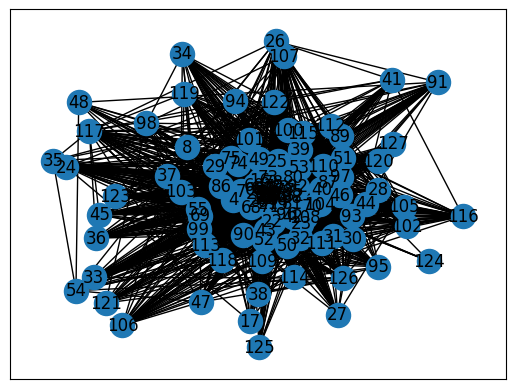

In [179]:
import networkx as nx
import matplotlib.pyplot as plt
g = []

with open('eco-foodweb-baydry.edges', 'r') as f:
    f.readline()
    f.readline()
    for line in f:
        dat = line.strip().split(' ')
        g.append((int(dat[0]),int(dat[1]),float(dat[2])))

G = nx.Graph()
G.add_weighted_edges_from(g)
nx.spring_layout(G, k=20, iterations=100)
nx.draw_networkx(G)
plt.show()

12. [3 points] Find the 10 nodes with the highest degree. 


In [180]:
# Stores (nodeID: int, degree: int) tuples
degrees = []

# Calculate degree of each node using custom function
for vertex in G:
    degree = get_degree(G.edges, vertex)
    degrees.append((vertex, degree))
    
# Sort (nodeID, degree) tuples by degree value
top_10_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)[:10]

# Display result
for node_id, degree in top_10_degrees:
    print("Node", node_id, "has a degree of", degree)

Node 57 has a degree of 110
Node 18 has a degree of 89
Node 85 has a degree of 76
Node 21 has a degree of 72
Node 55 has a degree of 64
Node 84 has a degree of 64
Node 96 has a degree of 61
Node 88 has a degree of 58
Node 97 has a degree of 57
Node 72 has a degree of 55


13. [3 points] Find the 10 nodes with the highest betweenness centrality. 


In [181]:
# Stores (nodeID: int, BC: int) tuples
centralities = []

# Calculate BC of each node using custom function
for vertex in G:
    centrality = get_betweenness(G.edges,vertex)
    centralities.append((vertex, centrality))
    
# Sort (nodeID, BC) tuples by degree value
top_10_centralities = sorted(centralities, key=lambda x: x[1], reverse=True)[:10]

# Display result
for node_id, centrality in top_10_centralities:
    print("Node", node_id, "has a BC of", centrality)

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

14. [3 points] Find the 10 nodes with the highest clustering coefficient. If there are ties, choose 10 to report and explain how the 10 were chosen. 



In [182]:
# Stores (nodeID: int, custer_coefficient: int) tuples
cluster_coeffs = []

# Calculate the clustering coefficient of each node using custom function
for vertex in G:
    custer_coefficient = get_clustering_coeff(G.edges, vertex)
    cluster_coeffs.append((vertex, custer_coefficient))
    
# Sort (nodeID, custer_coefficient) tuples by degree value
top_10_coeffs = sorted(degrees, key=lambda x: x[1], reverse=True)[:10]

# Display result
for node_id, coeff in top_10_coeffs:
    print("Node", node_id, "has a clustering coefficient of", coeff)

Node 57 has a clustering coefficient of 110
Node 18 has a clustering coefficient of 89
Node 85 has a clustering coefficient of 76
Node 21 has a clustering coefficient of 72
Node 55 has a clustering coefficient of 64
Node 84 has a clustering coefficient of 64
Node 96 has a clustering coefficient of 61
Node 88 has a clustering coefficient of 58
Node 97 has a clustering coefficient of 57
Node 72 has a clustering coefficient of 55


15. [3 points] Find the top 10 nodes as ranked by eigenvector centrality 


In [183]:
# calculate our eigenvectors 
ecs = nx.eigenvector_centrality(G)

# sort up the values 
res = dict(sorted(ecs.items(), key = itemgetter(1), reverse = True,)[:10])

# print out our results
print("\nOur top 10 nodes as ranked by eigenvector centrality:\n")
i = 0
for k, v in res.items():
    print(str(i+1)+": Node "+str(k)+" has an eigenvector centrality of "+str(v))
    i = i + 1


Our top 10 nodes as ranked by eigenvector centrality:

1: Node 57 has an eigenvector centrality of 0.23635919465689598
2: Node 18 has an eigenvector centrality of 0.18707712239855084
3: Node 85 has an eigenvector centrality of 0.17585172644469307
4: Node 21 has an eigenvector centrality of 0.15677811909232373
5: Node 55 has an eigenvector centrality of 0.15316633016832779
6: Node 84 has an eigenvector centrality of 0.15300697142152256
7: Node 96 has an eigenvector centrality of 0.14810021201879744
8: Node 39 has an eigenvector centrality of 0.13500325532775756
9: Node 88 has an eigenvector centrality of 0.13378828248109642
10: Node 97 has an eigenvector centrality of 0.12998985933783633


In [185]:
# calculate our eigenvectors 
A = nx.adjacency_matrix(G).todense()
mat = np.zeros(A.shape)
for i, row in enumerate(A):
    for j, item in enumerate(row):
        if item > 0:
            mat[i][j] = 1
        else:
            mat[i][j] = 0

ecs1 = get_eigenvector_centrality(mat.T, tol=1e-6)
ecs2 = nx.eigenvector_centrality(G, tol=1e-6)


# sort up the values 
res1 = sorted(ecs1, reverse = True)[:10]
res2 = sorted(ecs2.items(), key = lambda x: x[1], reverse = True)[:10]

# for node_id, centrality in res2:
#     print(f"Networkx {node_id}: {centrality}")
#     print(f"Computed {node_id}: {ecs1[node_id-1]}")


# print out our results
print("\nOur top 10 nodes as ranked by eigenvector centrality:\n")
for k, v in res2:
    print("Node",k,"has an eigenvector centrality of", ecs1[k-1])
    print("Node",k,"has an eigenvector centrality of", v)


Our top 10 nodes as ranked by eigenvector centrality:

Node 57 has an eigenvector centrality of 0.2363589682548113
Node 57 has an eigenvector centrality of 0.23635919465689598
Node 18 has an eigenvector centrality of 0.18707675164943285
Node 18 has an eigenvector centrality of 0.18707712239855084
Node 85 has an eigenvector centrality of 0.17585145082152387
Node 85 has an eigenvector centrality of 0.17585172644469307
Node 21 has an eigenvector centrality of 0.15677758694387864
Node 21 has an eigenvector centrality of 0.15677811909232373
Node 55 has an eigenvector centrality of 0.15316591697334034
Node 55 has an eigenvector centrality of 0.15316633016832779
Node 84 has an eigenvector centrality of 0.15300674708934497
Node 84 has an eigenvector centrality of 0.15300697142152256
Node 96 has an eigenvector centrality of 0.14809955299390182
Node 96 has an eigenvector centrality of 0.14810021201879744
Node 39 has an eigenvector centrality of 0.13500270771304373
Node 39 has an eigenvector cen

16. [3 points] Find the top 10 nodes as ranked by Pagerank 


In [186]:
# calculate our pageranks
pgr = nx.pagerank(G)

# sort up the values 
res = dict(sorted(pgr.items(), key = itemgetter(1), reverse = True,)[:10])

# print out our results
print("\nOur top 10 nodes as ranked by pagerank:\n")
i = 0
for k, v in res.items():
    print(str(i+1)+": Node "+str(k)+" has a pagerank of "+str(v))
    i = i + 1


Our top 10 nodes as ranked by pagerank:

1: Node 128 has a pagerank of 0.14881737814743948
2: Node 57 has a pagerank of 0.12548119922112694
3: Node 1 has a pagerank of 0.08485569707414439
4: Node 18 has a pagerank of 0.07575404766351311
5: Node 10 has a pagerank of 0.055451563192975145
6: Node 56 has a pagerank of 0.046985714139343694
7: Node 19 has a pagerank of 0.042430623757402856
8: Node 15 has a pagerank of 0.041045641106368366
9: Node 58 has a pagerank of 0.036056153156254316
10: Node 65 has a pagerank of 0.026407536480826693


17. [3 points] Comment on the differences and similarities in questions 12-16. Are the highly ranked nodes 
mostly the same? Do you notice significant differences in the rankings? Why do you think this is the case? 


Both are analyzing the top ten nodes of the same dataset, however, the metrics used to measure them are different. Degree is a measure of the number of edges connected to a given node. Therefore it is a simple metric to calculate, however Pagerank is the sum of the pagerank scores of the nodes a node is connected to divided by its out-degree. Notably Pagerank is most commonly used with directed graphs, however, we are instead given the instruction to treat the graph as undirected and unweighted with no loops or parallel edges. This causes problems for the normal behavior of Pagerank, and as a result the Pagerank for our graph should be proportional to the degrees of the nodes of our graph. Analyzing the returned data from both our measures we see Nodes 57 and 18 appear in both outputs, with pageranks of .12548 , .07575 and degrees of 110 and 89 respectively. 110/.12548 = 876.6 and 89/.07575 = 1174.9 These two datapoints do not at least to me suggest a legitimately proportional relationship, though that assessment may be due to my lack of experience with this topic and knowledge of what qualifies as proportional in this case. Those two values are admittedly more similar than different so I may be looking for a value too closely. The highly ranked nodes shared in both graphs are 57 and 18 alone. Meaning that the same nodes were only present in 2/10 cases or 20% of the time. It does seem more common than I had expected given the size of the data, and both are similarly high in the order, with 57 beating out 18 in both graphs and both values being in the top 4 of both graphs as well. Outside of that I must say that the rest of the values are indeed different. If I were to make a hypothesis as to why this is the case, degree is a value where outgoing and incoming data contributes to ranking, additionally it is a number, as a result I imagine many values in close proximity might boost eachothers numbers, contributing to clustering. Whereas pagerank is a percentile value with a divisior based on the same connections. Values attatched to values with high clustering but attatched to less values themselves will prosper more in pagerank as the divisor would be theoretically lower. In my mind this seems like a logical reason for why such differences might make themselves apparent. 

18. [3 points] Compute the average shortest path length in the graph. Based on your result, does the graph 
exhibit small-world behavior?

In [187]:
print("The average shortest path length is "+str(nx.average_shortest_path_length(G)))
print ("The natural log of the number of nodes in the graph is "+str(math.log(G.number_of_nodes())))

The average shortest path length is 1.7723917322834646
The natural log of the number of nodes in the graph is 4.852030263919617


Based on the above calculations I believe our graph clearly exhibits small-world behavior. 

19. [5 points] Plot the degree distribution of the graph on a log-log-scale. Does the graph exhibit power law 
behavior? Include the plot and the code used to generate it in your submission. 


Text(0, 0.5, 'Frequency')

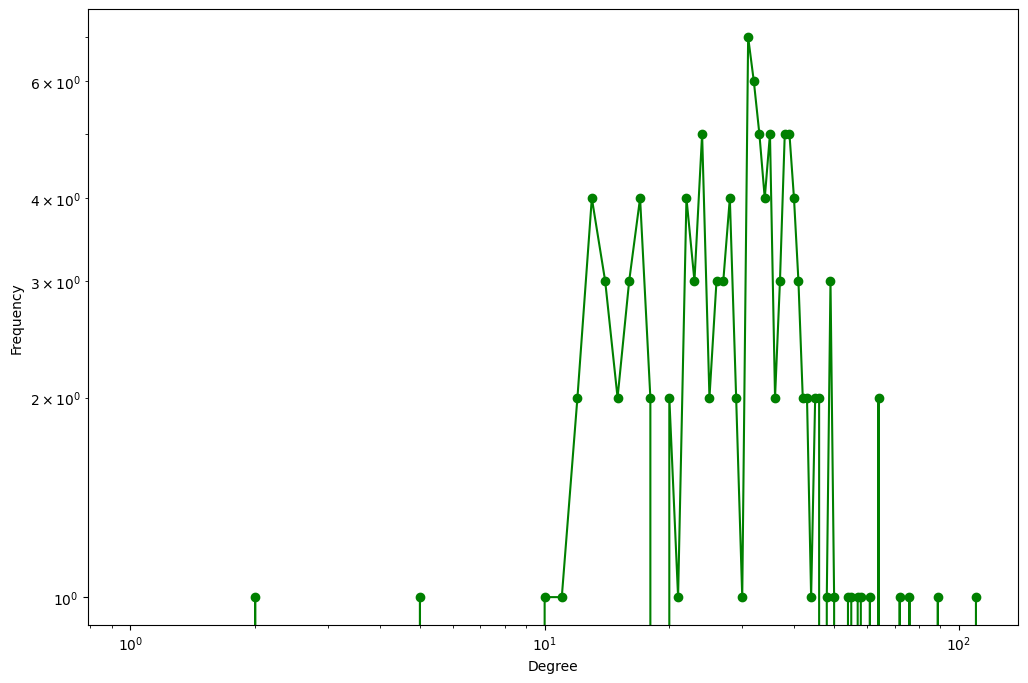

In [188]:
import networkx as nx
import matplotlib.pyplot as plt

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

Based on the above plot, we can safely say that the distribution does not exhibit the power law.

20. [3 points EXTRA CREDIT] Create a log-log plot with the logarithm of node degree on the x-axis and 
the logarithm of the average clustering coefficient of nodes with that degree on the y-axis. Does the 
clustering coefficient exhibit power law behavior (is there a clustering effect)? Include the plot and the code 
used to generate it in your submission. μL

Text(0, 0.5, 'Logarithm of Average Clustering Coef')

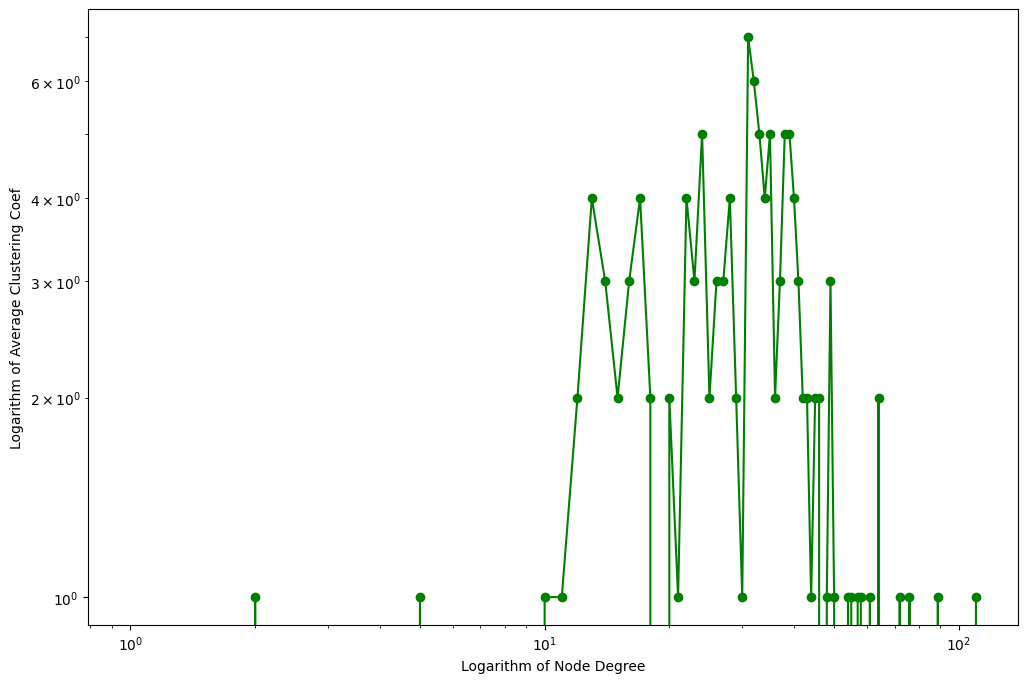

In [189]:
import networkx as nx
import matplotlib.pyplot as plt
import math

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))

#storage of averageCC for each node frequency
#averageCC = []
#runningAv = 0

#for x in degrees:
#    runningAv = runningAv + nx.clustering(G,x)
#    averageCC.append(runningAv)
plt.figure(figsize=(12, 8)) 
#plt.loglog(degrees, averageCC,'go-') 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Logarithm of Node Degree')
plt.ylabel('Logarithm of Average Clustering Coef')
